##   1.描述性统计

In [1]:
###数据集描述与属性说明###：
##数据说明：本数据是一份汽车贷款违约数据,因变量为是否违约(bad_ind)
##[T]因变量,[N]数值变量,[C]分类变量,[S]序数变量,[D]时间
##application_id	申请者ID
##account_number	帐户号
##[T]bad_ind	是否违约
##[D]vehicle_year	汽车购买时间
##[C]vehicle_make	汽车制造商
##[C]bankruptcy_ind	曾经破产标识
##[N]tot_derog	五年内信用不良事件数量(比如手机欠费消号)
##[N]tot_tr	全部帐户数量
##[N]age_oldest_tr	最久账号存续时间(月)
##[N]tot_open_tr	在使用帐户数量
##[N]tot_rev_tr	在使用可循环贷款帐户数量(比如信用卡)
##[N]tot_rev_debt	在使用可循环贷款帐户余额(比如信用卡欠款)
##[N]tot_rev_line	可循环贷款帐户限额(信用卡授权额度)
##[N]rev_util	可循环贷款帐户使用比例(余额/限额)
##[N]fico_score	FICO打分
##[N]purch_price	汽车购买金额(元)
##[N]msrp	建议售价
##[N]down_pyt	分期付款的首次交款
##[N]loan_term	贷款期限(月)
##[N]loan_amt	贷款金额
##[N]ltv	贷款金额/建议售价*100
##[N]tot_income	月均收入(元)
##[N]veh_mileage	行使历程(Mile)
##[C]used_ind	是否使用
##[N]weight	样本权重
##读取数据

accepts=read.csv("data/accepts.csv",fileEncoding="GBK")

head(accepts)

application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,⋯,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
2314049,11613,1,1998,FORD,N,7,9,64,2,⋯,650,17200.00,17350,0.00,36,17200.00,99,6550.00,24000,1
63539,13449,0,2000,DAEWOO,N,0,21,240,11,⋯,649,19588.54,19788,683.54,60,19588.54,99,4666.67,22,0
7328510,14323,1,1998,PLYMOUTH,N,7,10,60,NA,⋯,613,13595.00,11450,0.00,60,10500.00,92,2000.00,19600,1
8725187,15359,1,1997,FORD,N,3,10,35,5,⋯,603,12999.00,12100,3099.00,60,10800.00,118,1500.00,10000,1
4275127,15812,0,2000,TOYOTA,N,0,10,104,2,⋯,764,26328.04,22024,0.00,60,26328.04,122,4144.00,14,0
8712513,16979,0,2000,DODGE,Y,2,15,136,4,⋯,680,26272.72,26375,0.00,36,26272.72,100,5400.00,1,0


In [2]:
##数据预处理
sapply(accepts,class)#查看数据类型
summary(accepts)

application_id account_number        bad_ind   vehicle_year   vehicle_make 
     "integer"      "integer"      "integer"      "integer"       "factor" 
bankruptcy_ind      tot_derog         tot_tr  age_oldest_tr    tot_open_tr 
      "factor"      "integer"      "integer"      "integer"      "integer" 
    tot_rev_tr   tot_rev_debt   tot_rev_line       rev_util     fico_score 
     "integer"      "integer"      "integer"      "integer"      "integer" 
   purch_price           msrp       down_pyt      loan_term       loan_amt 
     "numeric"      "numeric"      "numeric"      "integer"      "numeric" 
           ltv     tot_income    veh_mileage       used_ind 
     "integer"      "numeric"      "integer"      "integer"

 application_id     account_number        bad_ind        vehicle_year 
 Min.   :    4065   Min.   :   11613   Min.   :0.0000   Min.   :   0  
 1st Qu.: 2513980   1st Qu.: 2567174   1st Qu.:0.0000   1st Qu.:1997  
 Median : 5110443   Median : 4988152   Median :0.0000   Median :1999  
 Mean   : 5039359   Mean   : 5021740   Mean   :0.2048   Mean   :1902  
 3rd Qu.: 7526973   3rd Qu.: 7556672   3rd Qu.:0.0000   3rd Qu.:2000  
 Max.   :10000115   Max.   :10010219   Max.   :1.0000   Max.   :9999  
                                                        NA's   :1     
    vehicle_make  bankruptcy_ind   tot_derog         tot_tr     
 FORD     :1112    : 217         Min.   : 0.00   Min.   : 0.00  
 CHEVY    : 654   N:5180         1st Qu.: 0.00   1st Qu.: 9.00  
 DODGE    : 533   Y: 448         Median : 0.00   Median :16.00  
 TOYOTA   : 417                  Mean   : 1.91   Mean   :17.08  
          : 299                  3rd Qu.: 2.00   3rd Qu.:24.00  
 CHEVROLET: 265                  Max.   :3

In [3]:
accepts$bad_ind=as.factor(accepts$bad_ind)
#accepts$bankruptcy_ind=as.factor(accepts$bankruptcy_ind)
accepts$used_ind=as.factor(accepts$used_ind)


##    3.1 描述性统计与探索型数据分析

In [4]:
table(accepts$bad_ind)


   0    1 
4648 1197 

In [5]:
m<-matrix(table(accepts$bankruptcy_ind))
prop.table(m,2)

0.03712575
0.88622754
0.07664671


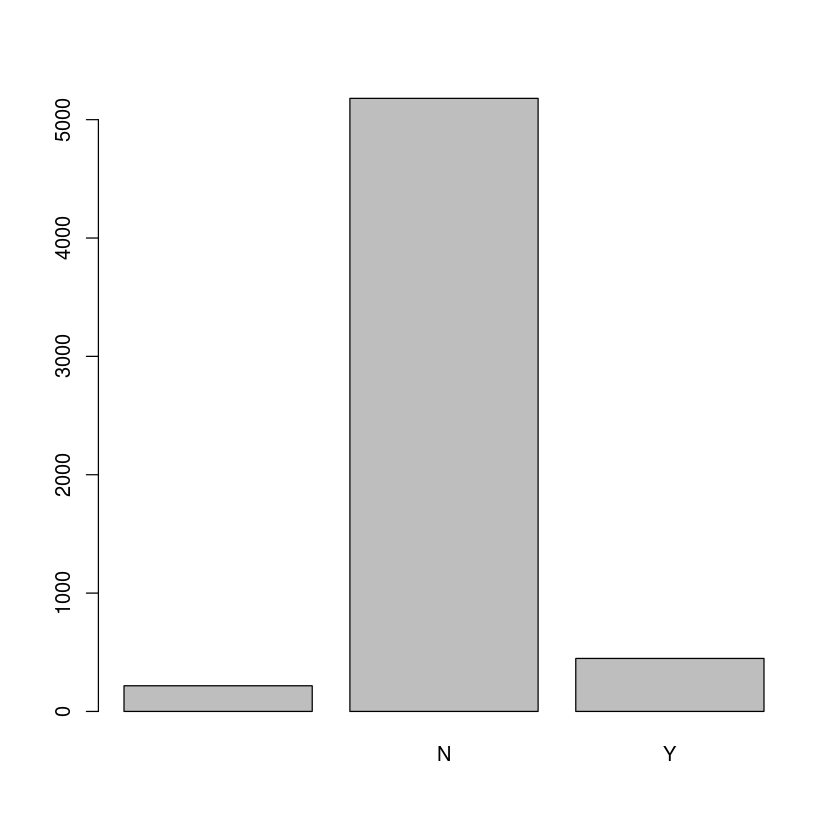

In [6]:
#对于两分类变量，也可以使用prettyR包中的xtab函数
barplot(table(accepts$bankruptcy_ind))

[1] 693.5287

[1] 693

25%   50%   75% 
653.0 693.0 735.5

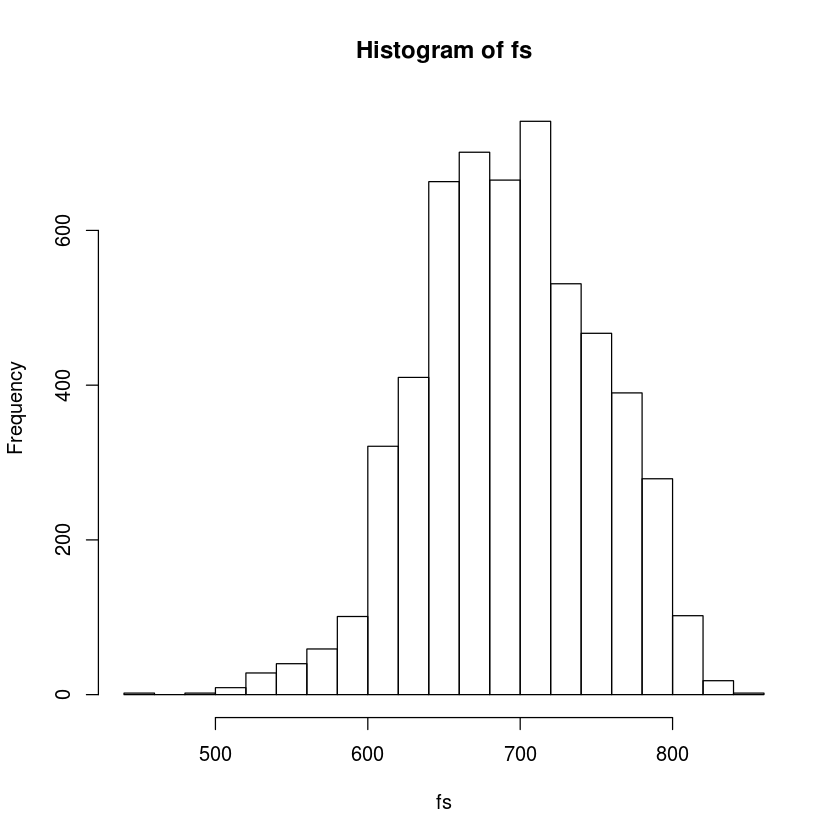

In [7]:
##3.1.2.连续变量分析
##3.1.2.2.1.数据的集中趋势2
#FICO_SCORE的均值与中位数
fs=accepts$fico_score
mean(fs,na.rm=T)#求fs的均值
median(fs,na.rm=T)#求fs的中位数
quantile(fs,probs=c(0.25,0.5,0.75),na.rm=T)#求a的上下四分位数与中位数
hist(fs,nclass=20)#绘制fs的直方图

In [8]:
##3.1.2.2.数据的离散程度
fs=accepts$fico_score
mad=function(x){
  mean(abs(x-mean(x,na.rm=T)),na.rm=T)
  }#定义平均绝对偏差函数mad()
max(fs,na.rm=T)-min(fs,na.rm=T)#极差
mad(fs)#平均绝对偏差
var(fs,na.rm=T)#求方差
sd(fs,na.rm=T)#求标准差
IQR(fs,na.rm=T)

[1] 405

[1] 46.97402

[1] 3345.642

[1] 57.84152

[1] 82.5